Mircrograd from scratch
 - These notebooks/docs are created when going through the lessons of zero to hero taught by andrej karpathy

In [81]:
!pip install rich

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 237 kB 6.8 MB/s 
     |████████████████████████████████| 51 kB 7.1 MB/s 


In [102]:
import math
import numpy as np
import matplotlib.pyplot as plt
from rich import print
from rich import pretty

In [103]:
pretty.install()

## Single Variable: `x`

Create a function

In [104]:
def f(x): return 3*x**2 - 4*x + 5

In [105]:
f(3.0)

20.0

In [106]:
xs = np.arange(-5, 5, 0.25)
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [107]:
ys = f(xs)
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

Plot the function

[<matplotlib.lines.Line2D object at 0x7f196a78c7d0>]

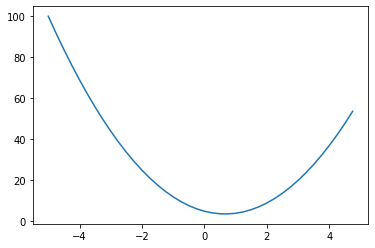

In [108]:
plt.plot(xs, ys)

### Derivative on increasing side of the curve

In [109]:
h = 0.0000000001
x = 3.0
(f(x + h) - f(x))/h

14.000001158365194

### Derivative on the decreasing side of the curve

In [110]:
h = 0.0000000001
x = -3.0
(f(x + h) - f(x))/h

-21.999966293151374

### Derivative on the bottom of the curve

In [111]:
h = 0.0000000001
x = 2/3
(f(x + h) - f(x))/h

0.0

## Multivariable: `a`, `b`, `c` 

In [112]:
a = 2.0
b = -3.0
c = 10.0
def d(a, b, c): return a*b + c
print(d(a, b, c))

4.0

### Derivative with respect to `a`

In [113]:
h = 0.0001

a = 2.0
b = -3.0
c = 10.0

d1 = d(a, b, c)

a += h
d2 = d(a, b, c)


print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)

d1 4.0

d2 3.999699999999999

slope -3.000000000010772

### Derivative with respect to `b` 

In [114]:
h = 0.0001

a = 2.0
b = -3.0
c = 10.0

d1 = d(a, b, c)

b += h
d2 = d(a, b, c)


print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)

d1 4.0

d2 4.0002

slope 2.0000000000042206

### Derivative with respect to `c`

In [115]:
h = 0.0001

a = 2.0
b = -3.0
c = 10.0

d1 = d(a, b, c)

c += h
d2 = d(a, b, c)


print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)

d1 4.0

d2 4.0001

slope 0.9999999999976694

## Create Value Object
(mentioned in the README of [micrograd](https://github.com/karpathy/micrograd) )

### Define intial template of Value Class

In [139]:
class Value:
  def __init__(self, data):
    self.data = data

  def __repr__(self):
    return f"Value(data={self.data})"

In [140]:
a = Value(2.0)
b = Value(-3.0)
a, b

(Value(data=2.0), Value(data=-3.0))

### Add the `add` function

In [141]:
class Value:
  def __init__(self, data):
    self.data = data
  
  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other): # ⭠ for adding among the value objects
    return Value(self.data + other.data)

In [142]:
a = Value(2.0)
b = Value(-3.0)
a, b

(Value(data=2.0), Value(data=-3.0))

In [143]:
a + b # a.__add__(b)

Value(data=-1.0)

### Add the `mul` function

In [144]:
class Value:
  def __init__(self, data):
    self.data = data
  
  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    return Value(self.data + other.data)
  
  def __mul__(self, other): # ⭠ for multiplying among the value objects
    return Value(self.data * other.data)

In [145]:
a = Value(2.0)
b = Value(-3.0)
a, b

(Value(data=2.0), Value(data=-3.0))

In [146]:
a * b # a.__mul__(b)

Value(data=-6.0)

In [147]:
c = Value(10.0)

In [148]:
d = a * b + c; d

Value(data=4.0)

### Add the functionality to know what values created a value with `_children`

In [155]:
class Value:
  def __init__(self, data, _children=()): # ⭠ Add _children
    self.data = data
    self._prev = set(_children) # ⭠ Add _children
  
  def __repr__(self):
    return f"Value(data ={self.data})"
  
  def __add__(self, other):
    return Value(self.data + other.data, (self, other))
  
  def __mul__(self, other):
    return Value(self.data * other.data, (self, other))

In [156]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
d = a*b + c
d

Value(data =4.0)

In [157]:
d._prev # childrens are -6.0 (a *b) and 10.0 (c)

{Value(data =10.0), Value(data =-6.0)}

### Add the functionality to know what operations created a value with `_op`

In [188]:
class Value:
  def __init__(self, data, _children=(), _op=''): # ⭠ Add _op
    self.data = data
    self._prev = set(_children)
    self._op = _op # ⭠ Add _op
  
  def __repr__(self):
    return f"Value(data={self.data})"
  
  def __add__(self, other):
    return Value(self.data + other.data, (self, other), '+')
  
  def __mul__(self, other):
    return Value(self.data * other.data, (self, other), '*')

In [189]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
d = a*b + c
d

Value(data=4.0)

In [190]:
d._prev

{Value(data=-6.0), Value(data=10.0)}

In [191]:
d._op

'+'

### Visualize the expression graph with operators and operands

In [205]:
from graphviz import Digraph

def trace(root):
  # build a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

In [206]:
def draw_dot(root, label):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label=label(n), shape='record') # ⭠ label function getting called
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      dot.edge(uid + n._op, uid)
  
  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)
  
  return dot

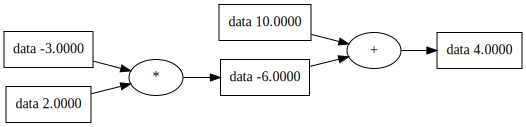

In [207]:
def label(node): return "{data %.4f}" % (node.data)
draw_dot(d, label)

### Add label to each node
> so that we know what are the corresponding variables for each value

In [224]:
class Value:
  def __init__(self, data, _children=(), _op='', label=''): # ⭠ Add label
    self.data = data
    self._prev = set(_children)
    self._op = _op
    self.label = label # ⭠ Add label
  
  def __repr__(self):
    return f"Value(label={self.label} data={self.data})"
  
  def __add__(self, other):
    return Value(self.data + other.data, (self, other), '+')
  
  def __mul__(self, other):
    return Value(self.data * other.data, (self, other), '*')

In [218]:
a = Value(2.0, label = 'a')
b = Value(-3.0, label='b')
c = Value(10, label = 'c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L

Value(label=L data=-8.0)

Change the `label` function to render the label

In [232]:
def label(node): return "{%s | {data %.4f}}" % (node.label, node.data)

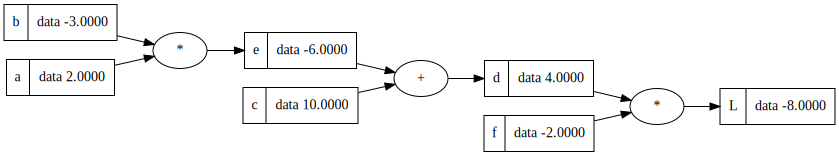

In [233]:
draw_dot(L, label)

### Add `grad` to `Value` class

In [225]:
class Value:
  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0 # ⭠ Add grad
    self._prev = set(_children)
    self._op = _op
    self.label = label
  
  def __repr__(self):
    return f"Value(label={self.label} data={self.data})"
  
  def __add__(self, other):
    return Value(self.data + other.data, (self, other), '+')
  
  def __mul__(self, other):
    return Value(self.data * other.data, (self, other), '*')

In [227]:
a = Value(2.0, label = 'a')
b = Value(-3.0, label='b')
c = Value(10, label = 'c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L.grad

0.0

In [230]:
def label(node): return "{%s | {data %.4f} | grad %.4f}" % (node.label, node.data, node.grad)

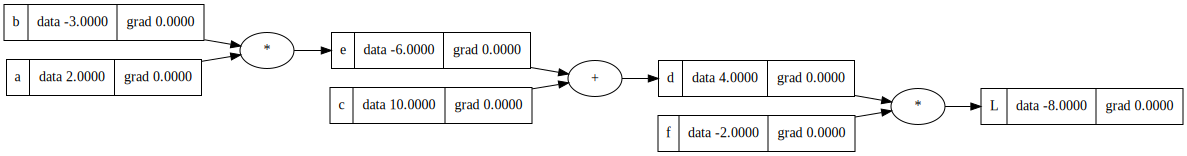

In [231]:
draw_dot(L, label)

### Create a function `lol` 
> Derive with respect to a

In [242]:
def lol():
  h = 0.0001

  a = Value(2.0, label = 'a')
  b = Value(-3.0, label='b')
  c = Value(10, label = 'c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L1 = L.data 

  a = Value(2.0 + h, label = 'a')
  b = Value(-3.0, label='b')
  c = Value(10, label = 'c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L2 = L.data

  print((L2 - L1) / h)

lol()

6.000000000021544

> Derive with respect to L

In [241]:
def lol():
  h = 0.0001

  a = Value(2.0, label = 'a')
  b = Value(-3.0, label='b')
  c = Value(10, label = 'c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L1 = L.data 

  a = Value(2.0, label = 'a')
  b = Value(-3.0, label='b')
  c = Value(10, label = 'c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L2 = L.data + h

  print((L2 - L1) / h)

lol()

0.9999999999976694

L = f * d

∂L/∂f = ∂(f*d)/∂f = d = 4.0

f.grad = 4.0





∂L/∂d = ∂(f*d)/∂d = f = -2.0

d.grad = -2.0 #
